<a href="https://colab.research.google.com/github/Manvi1718/Pytorch/blob/main/PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with PyTorch

## 1) Make Classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples=1000

# create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [3]:
len(X) , len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X :\n {X[:5]}")
print(f"First 5 samples of y :\n {y[:5]}")


First 5 samples of X :
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y :
 [1 1 1 1 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"x1" :X[:,0],
                        "X2" :X[:,1],
                        "label":y})
circles.head(10)

,x1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


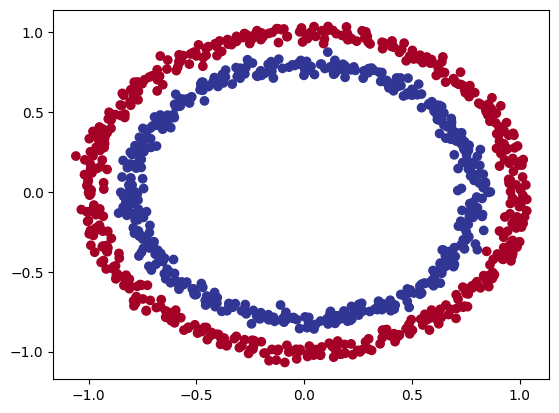

In [6]:
# Visualise
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note** : The data we are working with is often referred to as toy dataset , a dataset that is small enough to experimnet on still sizeable to practice fundamentals .

### 1.1) Check input and output shapes

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"value of 1 sample for X : {X_sample} and the same for y : {y_sample}")
print(f"shapes for one sample of X : {X_sample.shape} and same for y : {y_sample.shape}")

value of 1 sample for X : [0.75424625 0.23148074] and the same for y : 1
shapes for one sample of X : (2,) and same for y : ()


### 1.2 ) Turn data into tensors and create train and test splits

In [10]:
import torch
torch.__version__

'2.0.1+cu118'

In [11]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
type(X) , X.dtype , y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [13]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X,
                                                      y,
                                                      test_size = 0.2 ,# 0.2 is 20% will be test and 80% will be train
                                                      random_state=42)

In [14]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(800, 200, 800, 200)

## 2) Building a model

Lets build a model to classify our blue or red dots

to do so , we want to :

1) setup device agnostic code so our code will run on an accelerator (GPU) if there is one .

2) Construct a model (by subclassing `nn.Module` )

3) define loss function and optimiser

4) create a training and test loop

In [15]:
import torch
from torch import nn

# make device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [16]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we have set up device agmostic code lets create a model :

1) Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module` )

2) Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data

3) define a `forward()` method that outlines the forward pass (or forward computations) of the model

4) Instantiate an instance of our model class and send it target device

In [17]:
# 1. Construct a model that subclass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling shapes of our data
    self.layer_1 = nn.Linear(in_features=2,out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5,out_features=1) # takes in 5 features from previous layers and output a single feature (same shape as y)

  # 3. Define the forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x))

# 4. instantiate the object of model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
device

'cpu'

In [19]:
next(model_0.parameters()).device

device(type='cpu')

In [20]:
# lets replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6211,  0.1180],
                      [-0.2244, -0.0016],
                      [-0.5314,  0.6737],
                      [-0.5402, -0.5785],
                      [-0.2857,  0.1526]])),
             ('0.bias', tensor([ 0.5960, -0.2232,  0.2052,  0.5610, -0.3174])),
             ('1.weight',
              tensor([[ 0.0398,  0.4240,  0.3668,  0.0607, -0.2567]])),
             ('1.bias', tensor([0.1971]))])

In [22]:
# make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)} , shape : {untrained_preds.shape}")
print(f"Lenth of test samples : {len(X_test)} , shape : {X_test.shape} ")
print(f"\nfirst 10 predictions : \n {torch.round(untrained_preds[:10])}")
print(f"\nfirst 10 labels : \n {y_test[:10]}")

Length of predictions : 200 , shape : torch.Size([200, 1])
Lenth of test samples : 200 , shape : torch.Size([200, 2]) 

first 10 predictions : 
 tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

first 10 labels : 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1) Setup loss function and optimizer

which loss function or optimizer we should use ?

again.. this is a problem specific.

for example for regression you might wabt MAE or MSE (mean absolute error and mean squared error)

For classification you might want binary cross entropy or categorical cross entropy.

As a reminder , loss function measures how *wrong* our model predictions are .

And for optimizers , 2 of the most common and useful are SGD and Adam , however pytroch has many built in optimizers .

* For the loss function we are going to use `torch.nn.BCEWithLogitsLoss()`

* For different optimizers see `torch.optim`.


In [23]:
# Setup loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built in .

# optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)


In [24]:
# Calculate accuracy - out of 100 examples , what percentage does our model get right ?

def accuracy(y_true , y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) *100
  return acc

## 3) Train Model

To train our model , we are going to build a training loop with the following steps :

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. optimizer step (gradient descent)

### 3.1) Going from raw logits ->predictions probabilites -> prediction labels
Our model outputs are going to be raw **logits**.

we can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. Sigmoid function for binary cross entropy and softmax for multi class classification).

Then we can convert our model's predictions probabilites to **prediction labels** by either rounding them or taking the `argmax()`.

In [25]:
# View the first 5 outputs of forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.5407],
        [0.4826],
        [0.4541],
        [0.5662],
        [0.0751]])

In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [27]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6320],
        [0.6184],
        [0.6116],
        [0.6379],
        [0.5188]])

For our prediction probability values , we need to perform a range-style rounding on them:

* `y_pred_probs`>= 0.5 , `y=1` (class 1)

* `y_pred_probs` < 0.5 , `y=0` (class 0)

In [28]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full(logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2) Building a Training and testing Loop

In [30]:
torch.manual_seed(42)

# set the number of epochs
epochs = 100

# put  data to target device

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

# build training and evaluation loop
for epoch in range(epochs):
  ### training
  model_0.train()

  # 1 . forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss / accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #               y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss() expects raw logits as input
                 y_train)
  acc = accuracy(y_true = y_train ,
                 y_pred = y_pred)

  # 3. Optmizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5 . Optmizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    #1 . forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate the test loss / acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy(y_true= y_test,
                        y_pred = test_pred)

  # print out whats hapening
  if epoch % 10 == 0:
    print(f"epoch : {epoch} | Loss : {loss:.5f} , Acc : {acc:.2f}% | Test loss : {test_loss:.5f} | Test Acc : {test_acc:.2f}% ")

epoch : 0 | Loss : 0.71057 , Acc : 54.12% | Test loss : 0.71050 | Test Acc : 54.00% 
epoch : 10 | Loss : 0.69967 , Acc : 53.75% | Test loss : 0.70125 | Test Acc : 53.00% 
epoch : 20 | Loss : 0.69600 , Acc : 51.62% | Test loss : 0.69815 | Test Acc : 52.00% 
epoch : 30 | Loss : 0.69464 , Acc : 51.25% | Test loss : 0.69697 | Test Acc : 51.50% 
epoch : 40 | Loss : 0.69403 , Acc : 51.00% | Test loss : 0.69640 | Test Acc : 49.50% 
epoch : 50 | Loss : 0.69371 , Acc : 50.88% | Test loss : 0.69606 | Test Acc : 51.50% 
epoch : 60 | Loss : 0.69351 , Acc : 50.75% | Test loss : 0.69581 | Test Acc : 49.50% 
epoch : 70 | Loss : 0.69338 , Acc : 50.50% | Test loss : 0.69561 | Test Acc : 47.50% 
epoch : 80 | Loss : 0.69328 , Acc : 50.12% | Test loss : 0.69545 | Test Acc : 48.50% 
epoch : 90 | Loss : 0.69320 , Acc : 50.62% | Test loss : 0.69533 | Test Acc : 48.50% 


## 4) Make Predictions and evaluate the model

From the metrics it looks like our model isnt't learning aything ...

so to inspect it lets make some predictions and make them visual!

in other words visualise , visualise , visualise ....

to do so we are going to import a function called `plot_decision_boundary()`

In [31]:
import requests
from pathlib import Path

# download helper functions from learn PyTorch rep (if it is not already downloaded)
if Path("helper_functions.py").is_file():
  print("helping_function.py already exist , skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions , plot_decision_boundary

Download helper_functions.py


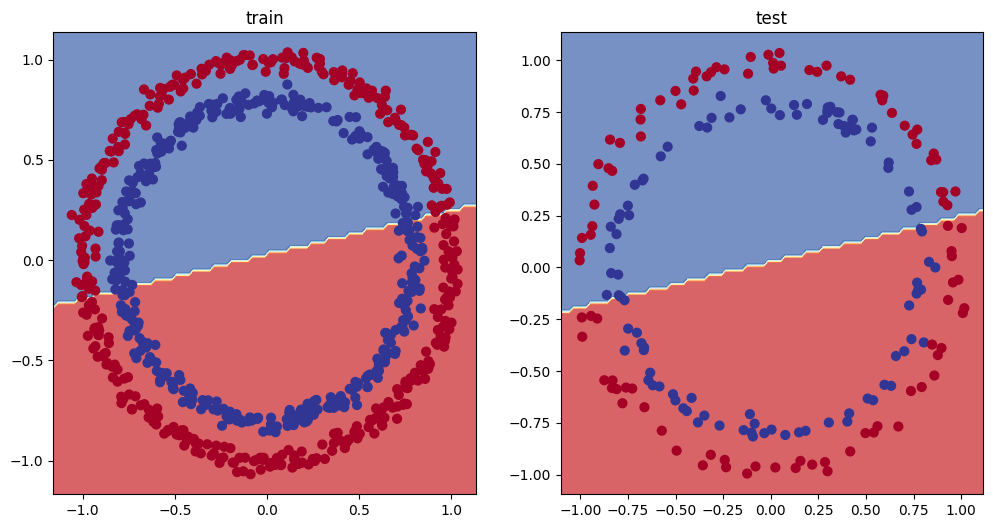

In [32]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

## 5) Improving a model(from a model perspective)

* Add more layers - give the model more chances to learn about patterns in data.
* Add more hidden neurons - go from 5 hidden neurons to 10 hidden neurons
* Fit for longer
* Changing in activation functions
* Changing the learning rate
* Changing the loss function

these options are all from a model's perspective because they deal directly with the model , rather than the data.

And because these options are all values we (as ML engineers and data scientiest ) can change , they are referred to as **hyperparameters**.

Let us try and imporve our model by:
* Adding more hidden units : 5->10
* increase the number of layers : 2 -> 3
* increase the number of epochs: 100 -> 1000

In [33]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10 , out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10 , out_features= 1)

  def forward(self,x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    #return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations speeds up where possible behind the scenes
    return z
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create a optimizer
optimizer = torch.optim.SGD(params = model_1.parameters() ,
                            lr = 0.1)

In [35]:
# write a training and testing loop
torch.manual_seed(42)

# training for longer
epochs = 1000

# put data on target device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  ### training
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> predictions

  # 2. Calculate the loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy(y_true=y_train,
                 y_pred = y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optmizer step
  optimizer.step

  ### testing
  model_1.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the loss
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy(y_true = y_test,
                        y_pred = test_pred)

  # print out whats happening
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Train Loss : {loss:.5f} |Train Acc : {acc:.2f}% | Test Loss : {test_loss:.5f} | Test Acc : {test_acc:.2f}% ")

Epoch : 0 | Train Loss : 0.69396 |Train Acc : 50.88% | Test Loss : 0.69261 | Test Acc : 51.00% 
Epoch : 100 | Train Loss : 0.69396 |Train Acc : 50.88% | Test Loss : 0.69261 | Test Acc : 51.00% 
Epoch : 200 | Train Loss : 0.69396 |Train Acc : 50.88% | Test Loss : 0.69261 | Test Acc : 51.00% 
Epoch : 300 | Train Loss : 0.69396 |Train Acc : 50.88% | Test Loss : 0.69261 | Test Acc : 51.00% 
Epoch : 400 | Train Loss : 0.69396 |Train Acc : 50.88% | Test Loss : 0.69261 | Test Acc : 51.00% 
Epoch : 500 | Train Loss : 0.69396 |Train Acc : 50.88% | Test Loss : 0.69261 | Test Acc : 51.00% 
Epoch : 600 | Train Loss : 0.69396 |Train Acc : 50.88% | Test Loss : 0.69261 | Test Acc : 51.00% 
Epoch : 700 | Train Loss : 0.69396 |Train Acc : 50.88% | Test Loss : 0.69261 | Test Acc : 51.00% 
Epoch : 800 | Train Loss : 0.69396 |Train Acc : 50.88% | Test Loss : 0.69261 | Test Acc : 51.00% 
Epoch : 900 | Train Loss : 0.69396 |Train Acc : 50.88% | Test Loss : 0.69261 | Test Acc : 51.00% 


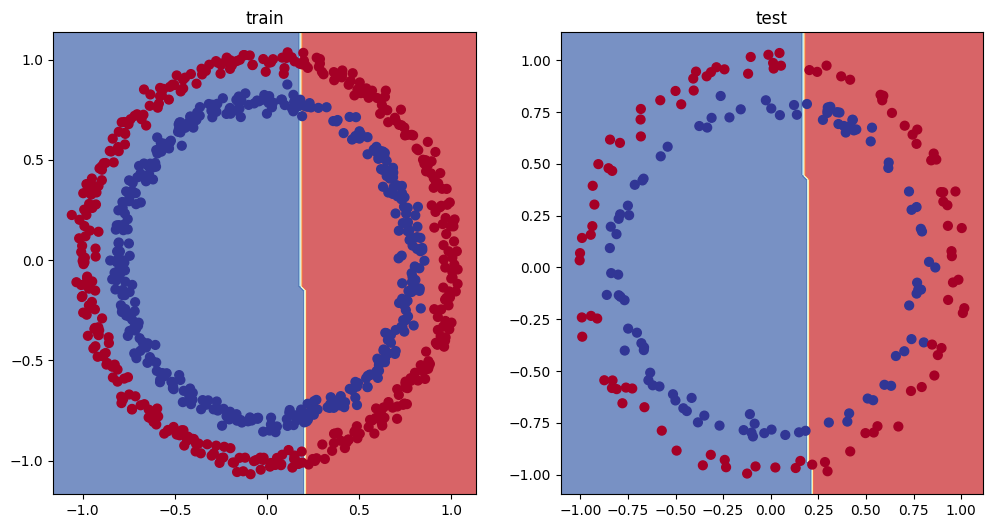

In [36]:
# Plot the decision boundary
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1) Preparing data to see if our model can fit a straight line

one way to troubleshoot to a larger problem is to test out a smaller problem.

In [37]:
# create some data( same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5] , y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [38]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression , y_train_regression = X_regression[:train_split] , y_regression[:train_split]
X_test_regression , y_test_regression = X_regression[train_split:] , y_regression[train_split:]

# check the lengths of each
len(X_train_regression) , len(y_train_regression) , len(X_test_regression) , len(y_test_regression)

(80, 80, 20, 20)

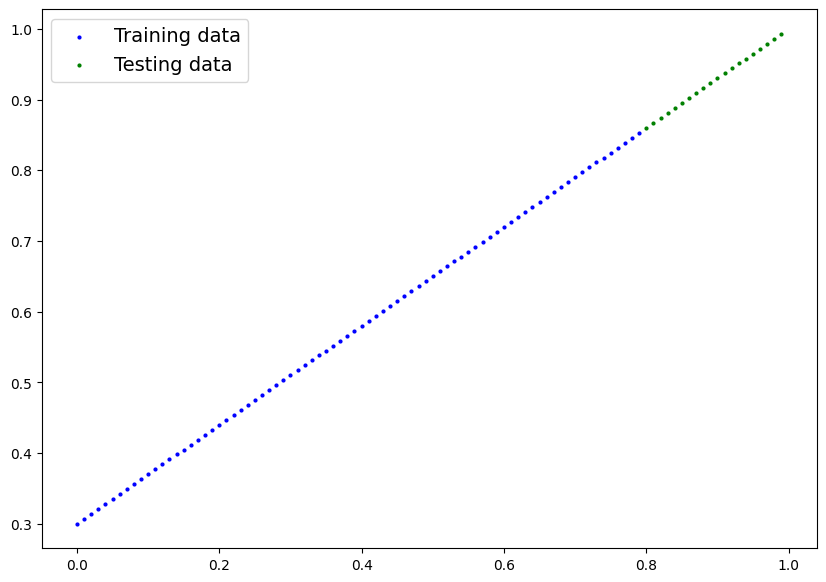

In [39]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression
)

In [40]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2) Adjusting `model_1` to fit a staright line

In [41]:
# Same architecture as model_1 ( but nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features = 1 , out_features = 10),
    nn.Linear(in_features = 10 , out_features = 10),
    nn.Linear(in_features = 10 , out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [43]:
# Train the model
torch.manual_seed(42)

# set the number of epochs
epochs = 2000

# Put the data on the target device
X_train_regression  , y_train_regression = X_train_regression.to(device) , y_train_regression.to(device)
X_test_regression  , y_test_regression = X_test_regression.to(device) , y_test_regression.to(device)

# training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred , y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred , y_test_regression)

  # print out whats happening
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.5f} | test loss : {test_loss:.5f}")

Epoch : 0 | Loss : 0.75986 | test loss : 0.91103
Epoch : 100 | Loss : 0.02858 | test loss : 0.00081
Epoch : 200 | Loss : 0.02533 | test loss : 0.00209
Epoch : 300 | Loss : 0.02137 | test loss : 0.00305
Epoch : 400 | Loss : 0.01964 | test loss : 0.00341
Epoch : 500 | Loss : 0.01940 | test loss : 0.00387
Epoch : 600 | Loss : 0.01903 | test loss : 0.00379
Epoch : 700 | Loss : 0.01878 | test loss : 0.00381
Epoch : 800 | Loss : 0.01840 | test loss : 0.00329
Epoch : 900 | Loss : 0.01798 | test loss : 0.00360
Epoch : 1000 | Loss : 0.01782 | test loss : 0.00333
Epoch : 1100 | Loss : 0.01674 | test loss : 0.00317
Epoch : 1200 | Loss : 0.01640 | test loss : 0.00316
Epoch : 1300 | Loss : 0.01648 | test loss : 0.00256
Epoch : 1400 | Loss : 0.01648 | test loss : 0.00323
Epoch : 1500 | Loss : 0.01632 | test loss : 0.00337
Epoch : 1600 | Loss : 0.01597 | test loss : 0.00284
Epoch : 1700 | Loss : 0.01458 | test loss : 0.00244
Epoch : 1800 | Loss : 0.01532 | test loss : 0.00275
Epoch : 1900 | Loss : 0.

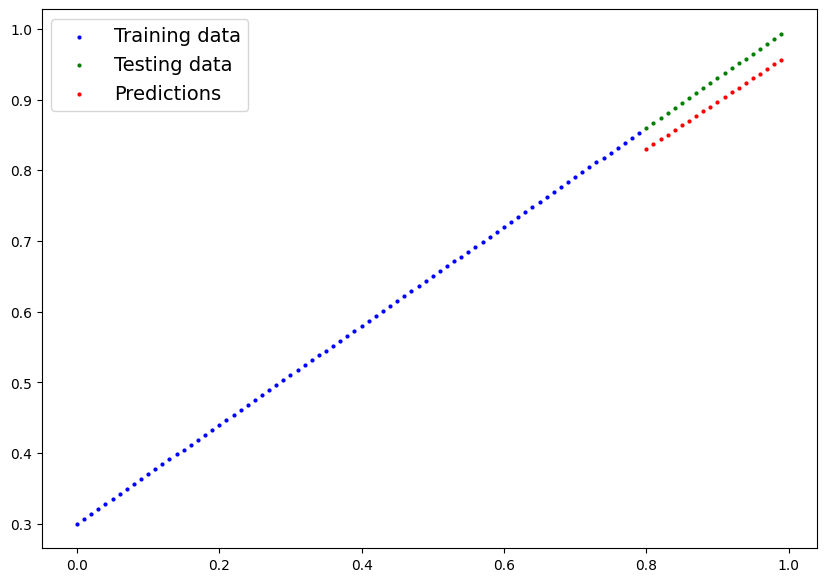

In [44]:
# Turn on evaluation mode
model_2.eval()

# make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

  # Plot data and predictions
  plot_predictions(train_data = X_train_regression,
                   train_labels = y_train_regression,
                   test_data = X_test_regression,
                   test_labels = y_test_regression,
                   predictions = y_preds)

## 6) Missing piece : Non Linearity

"What patterns could you draw if you were given an infinite amount of straight and non straight line ?"

Or in ML terms , an infinite(but really it is finite) of linear and non linear functions?

### 6.1) Recreating non linear data(red and blue circles)

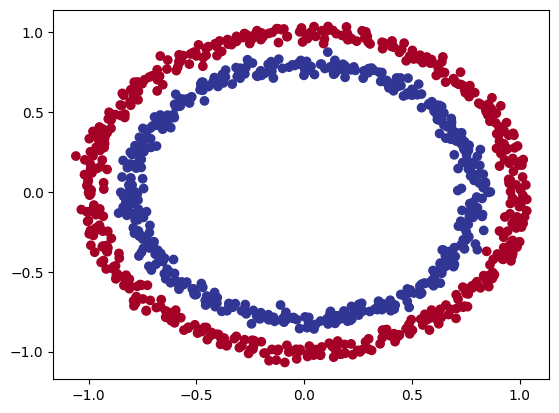

In [45]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X , y= make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0],X[:,1] , c = y , cmap = plt.cm.RdYlBu)

In [46]:
# convert data into tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test data
X_train , X_test , y_train , y_test =train_test_split(X,
                                                      y,
                                                      test_size = 0.2,
                                                      random_state=42)
X_train[:5] , y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2) Building a model with non-linearity
* Linear - straight lines
* Non-linear - Non-straight lines

Artificial neural networks are a large combination of linear(straight) and non-straight(non-linear) functions which are potentially able to find patterns in data.

In [47]:
# Build a amodel with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10 , out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10 , out_features = 1)
    self.relu = nn.ReLU()

  def forward(self,x):
    # where should we put our non_linear actication function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
# setup loss and optmizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr =0.1)

spam or not spam

credir card fraud or not fraud

insaurance claim - at fault or not fault

### 6.3) Training a model with non linearity

In [49]:
# Random seeds
torch.manual_seed(42)

# put all data on target device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### training
  model_3.train()

  #1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. calculate the loss
  loss = loss_fn(y_logits , y_train)
  acc = accuracy(y_true = y_train ,
                 y_pred = y_pred)

  #3. optmizer zero grad
  optimizer.zero_grad()

  #4. Loss Bckward
  loss.backward()

  #5. Optmizer step
  optimizer.step()

  ### testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy(y_true = y_test,
                        y_pred =test_pred)

  # print whats happening
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.4f} | Acc : {acc:.2f}% | Test loss : {test_loss:.4f} | Test Acc : {test_acc:.2f}%")


Epoch : 0 | Loss : 0.6929 | Acc : 50.00% | Test loss : 0.6932 | Test Acc : 50.00%
Epoch : 100 | Loss : 0.6912 | Acc : 52.88% | Test loss : 0.6910 | Test Acc : 52.50%
Epoch : 200 | Loss : 0.6898 | Acc : 53.37% | Test loss : 0.6894 | Test Acc : 55.00%
Epoch : 300 | Loss : 0.6879 | Acc : 53.00% | Test loss : 0.6872 | Test Acc : 56.00%
Epoch : 400 | Loss : 0.6852 | Acc : 52.75% | Test loss : 0.6841 | Test Acc : 56.50%
Epoch : 500 | Loss : 0.6810 | Acc : 52.75% | Test loss : 0.6794 | Test Acc : 56.50%
Epoch : 600 | Loss : 0.6751 | Acc : 54.50% | Test loss : 0.6729 | Test Acc : 56.00%
Epoch : 700 | Loss : 0.6666 | Acc : 58.38% | Test loss : 0.6632 | Test Acc : 59.00%
Epoch : 800 | Loss : 0.6516 | Acc : 64.00% | Test loss : 0.6476 | Test Acc : 67.50%
Epoch : 900 | Loss : 0.6236 | Acc : 74.00% | Test loss : 0.6215 | Test Acc : 79.00%


### 6.4) Evaluating a model trained with non-linear activation functions

In [50]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

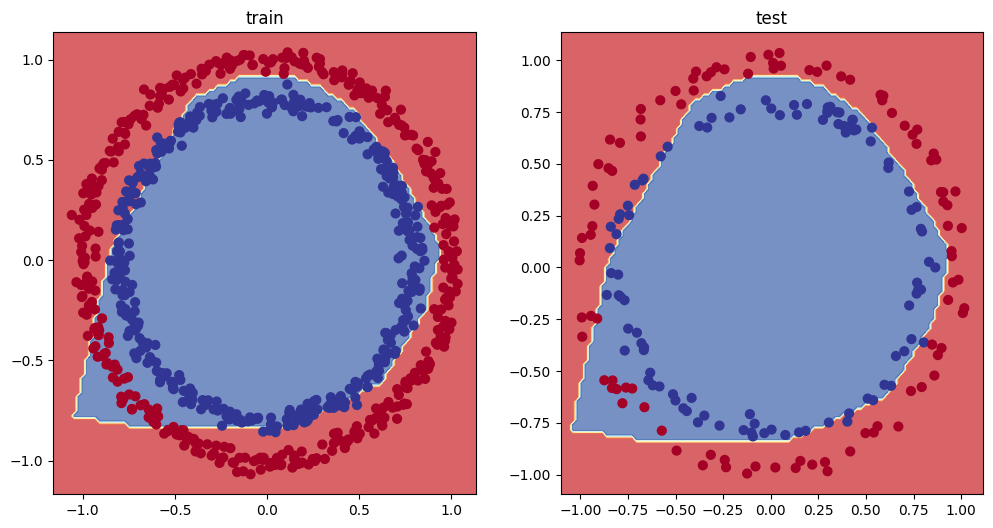

In [51]:
# Plot decision boundaries
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

## 7. Replicating non-Linear activation functions

Neural networks , rather than us telling the model to learn we give it tools to discover patterns in data and it tries to figure out best patterns on its own

And these tools are linear and non Linear functions

In [52]:
# Create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

In [53]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

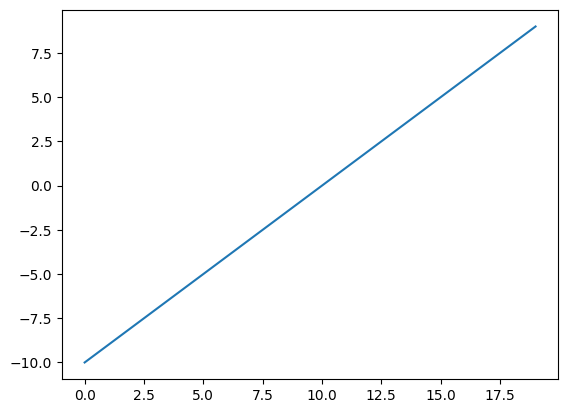

In [54]:
# Visualise the data
plt.plot(A)

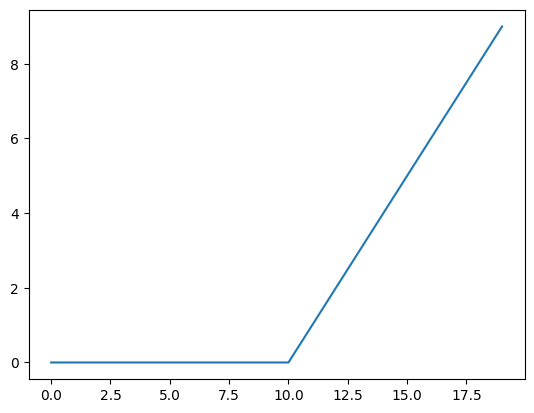

In [55]:
plt.plot(torch.relu(A))

In [56]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x) # inputs must be tensors

In [57]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

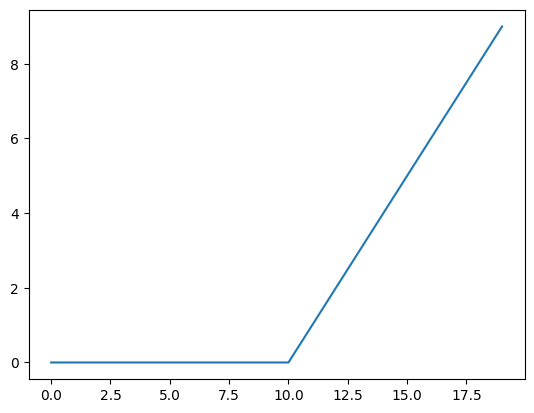

In [58]:
# plot relu activation function
plt.plot(relu(A))

In [59]:
# sigmoid
def sigmoid(x):
  return 1/(1+ torch.exp(-x))

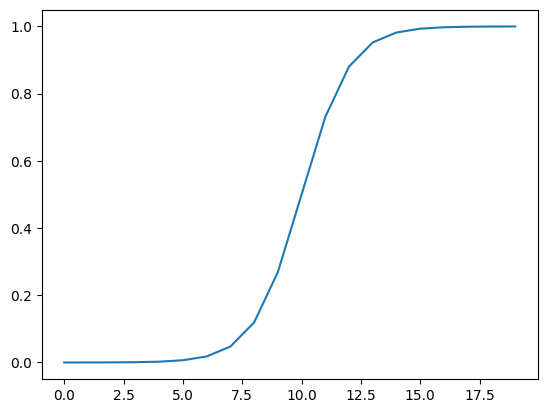

In [60]:
plt.plot(torch.sigmoid(A))

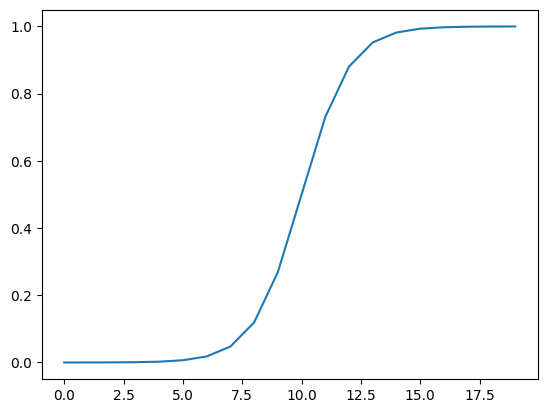

In [61]:
plt.plot(sigmoid(A))

## 8) Putting it all together with a multi class classification problem

* binary classification = one thing or another (cat v/s dog , spam or not spam , fraud or not fraud)

* multi-class classification - more than 1 thing or another (cat vs dog vs chicken)

### 8.1)Creating a toy multi class  dataset

In [62]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

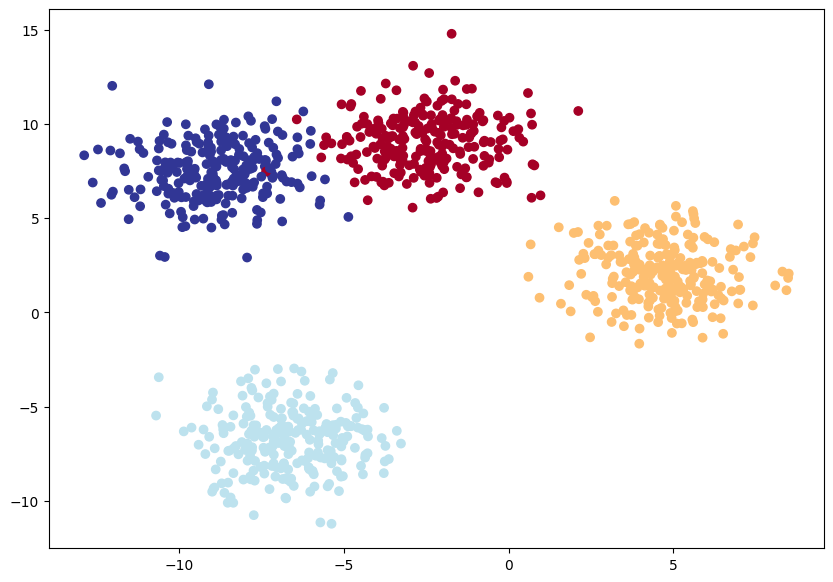

In [78]:
# set hyper parameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. create multi class data
X_blob , y_blob = make_blobs(n_samples = 1000 ,
                             n_features = NUM_FEATURES,
                             centers = NUM_CLASSES ,
                             cluster_std =1.5, # give the classes a little shake up
                             random_state = RANDOM_SEED)

#2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3. split into train test
X_blob_train , X_blob_test , y_blob_train , y_blob_test = train_test_split(X_blob ,
                                                                           y_blob,
                                                                           test_size=0.2,
                                                                          random_state=RANDOM_SEED)
# 4. Plot the data
plt.figure(figsize =(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c = y_blob , cmap = plt.cm.RdYlBu)

### 8.2) Building a multi-class classification model in PyTorch

In [79]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [80]:
# build a multi class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units =8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features , out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units , out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units , out_features = output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

# create instance of model and send to target device
model_4 = BlobModel(input_features = 2,
                    output_features =4,
                    hidden_units = 8).to(device)

In [81]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [82]:
X_blob_train.shape , y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [83]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3) Create a loss function and a optimizer for a multi class classification model

In [84]:
# Create a loss function for multi class classification
loss_fn = nn.CrossEntropyLoss()

# create an optimizer for multi class classification
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1)

### 8.4) getting prediction probabilities for a multi-class PyTorch model

in order to evaluate and train and test our model , we need to convert our model's outputs (logits)  to prediction probabilities and then to prediction labels .

logits(raw output of our model) -> pred probs(use `torch.softmax`) -> pred labels(take the argmax of prediction probabilities)

In [85]:
# lets get raw outputs of our model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [86]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [87]:
# Convert our model logits outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits , dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [88]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [89]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [90]:
# Convert our model 's prediction prob to pred labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [91]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 ) Creating a training loop and testing loop for a multi class Classification model

In [92]:
# Fit the multi class model to the data
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# set number of epochs
epochs = 100

# put data to target device
X_blob_train , y_blob_train = X_blob_train.to(device) , y_blob_train.to(device)
X_blob_test , y_blob_test = X_blob_test.to(device) , y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits , y_blob_train)
  acc = accuracy(y_true = y_blob_train,
                 y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits , dim = 1).argmax(dim=1)

    test_loss = loss_fn(test_logits , y_blob_test)
    test_acc = accuracy(y_true= y_blob_test,
                        y_pred = test_preds)

  # print whats happening
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.4f} | Acc : {acc:.2f}% | Test Loss : {test_loss:.4f} | test Acc : {test_acc:.2f}%")

Epoch : 0 | Loss : 1.1588 | Acc : 40.38% | Test Loss : 1.0755 | test Acc : 48.00%
Epoch : 10 | Loss : 0.6448 | Acc : 96.75% | Test Loss : 0.6607 | test Acc : 97.50%
Epoch : 20 | Loss : 0.4254 | Acc : 98.50% | Test Loss : 0.4307 | test Acc : 100.00%
Epoch : 30 | Loss : 0.2529 | Acc : 99.12% | Test Loss : 0.2451 | test Acc : 99.50%
Epoch : 40 | Loss : 0.1123 | Acc : 99.25% | Test Loss : 0.1023 | test Acc : 99.50%
Epoch : 50 | Loss : 0.0663 | Acc : 99.25% | Test Loss : 0.0585 | test Acc : 99.50%
Epoch : 60 | Loss : 0.0507 | Acc : 99.25% | Test Loss : 0.0429 | test Acc : 99.50%
Epoch : 70 | Loss : 0.0430 | Acc : 99.25% | Test Loss : 0.0349 | test Acc : 99.50%
Epoch : 80 | Loss : 0.0384 | Acc : 99.25% | Test Loss : 0.0299 | test Acc : 99.50%
Epoch : 90 | Loss : 0.0352 | Acc : 99.25% | Test Loss : 0.0266 | test Acc : 99.50%


### 8.6) Making and evaluating predictions with pytorch multi class model

In [93]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# view first ten predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [94]:
# go from logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [96]:
# go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [97]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

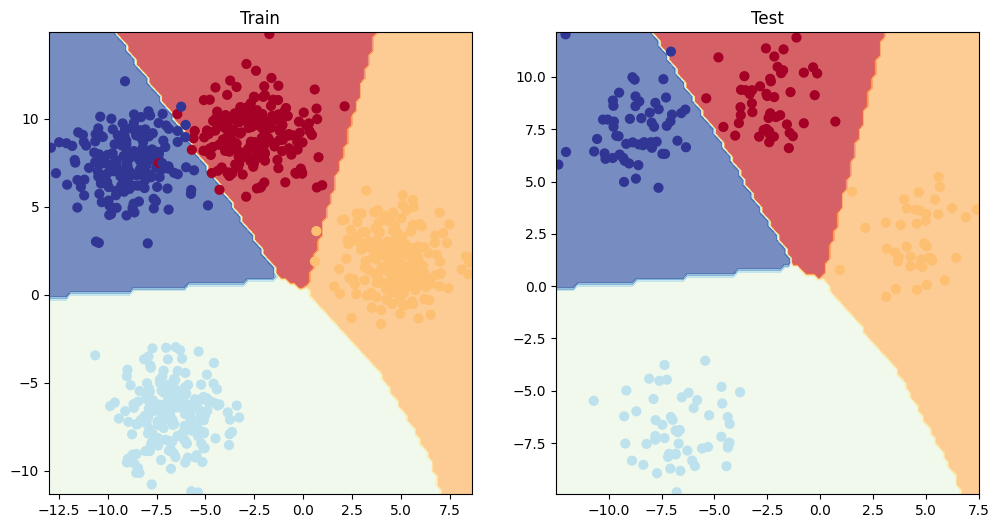

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## 9) A few More Classification metrics...(to evaluate our classification model)

* Accuracy - out of 100 samples how many does our model gets right ?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [99]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 5.5 MB/s eta 0:00:00


In [108]:
from torchmetrics import Accuracy

# setup metric
torchmetric_accuracy = Accuracy(task='multiclass',
                                num_classes=NUM_CLASSES).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds , y_blob_test)

tensor(0.9950)